# 7. Bloch-Multivektor

Eine Bloch-Kugel kann nur den Zustand eines Qubits darstellen. Will man einen Registerzustand beschreiben, benötigt man für jedes Qubit eine eigene Bloch-Kugel. Genau das leistet die Funktion `bloch_multivector`. Allerdings versagt diese Funktion bei verschränkten Qubits. Weshalb erfahren Sie weiter unten.

Zuerst wird die Funktion imortiert:

In [1]:
from qiskit.visualization import plot_bloch_multivector

Wir betrachten eine Situation, bei der sich die beiden Qubits im Zustand $H|0\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle$ befinden. Den Registerzustand erhalten wir, indem wir die beiden Zustandsfunktionen miteinander multiplizieren:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\cdot \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)=\frac{1}{2}|00\rangle +\frac{1}{2}|01\rangle +\frac{1}{2}|10\rangle +\frac{1}{2}|11\rangle
$$


Diesen zwei-Qubit Register-Zustand wollen wir mit `plot_bloch_multivector` plotten. Dazu müssen wir der Funktion den vierkomponentigen Zustandsvektor `[0.5, 0.5, 0.5, 0.5]` übergeben.


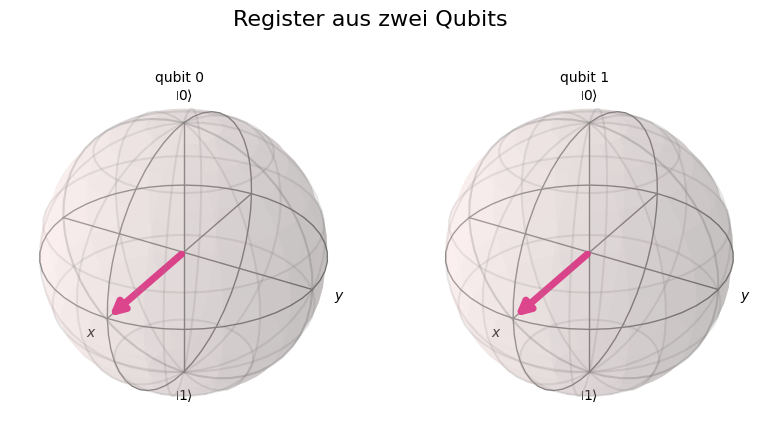

In [2]:
plot_bloch_multivector([0.5, 0.5, 0.5, 0.5], title='Register aus zwei Qubits')

## Ergebnis des Statevector Simulators ausgeben

Wir können den ganzen Prozess in einem Quantenschaltkreis darstellen:



In [3]:
from qiskit import QuantumCircuit, execute, BasicAer

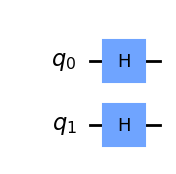

In [4]:
qc=QuantumCircuit(2) # Damit wird der Quantenschaltkreis mit zwei Qubits definiert

qc.h([0,1]) # Damit wird das Hadamard-Gate auf beide Qubits (q_0 und q1) angewendet

qc.draw('mpl') # Schliesslich wird der Schaltkreis mit MatPlotList ('mpl') gezeichnet

Wenn wir nun das Ergebnis (den Registerzustand nach dieser Operation) der Funktion `plot_bloch_multivector` übergeben wollen, müssen wir diesen mit dem `statevector_simulator` berechnen. Dazu müssen wir diesen als Backend definieren:

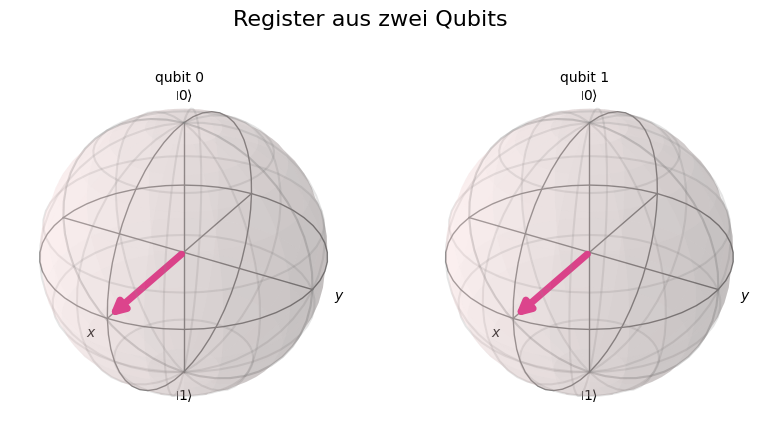

In [5]:
backend = BasicAer.get_backend('statevector_simulator') # Der Statevector Simulator wird als Backend gesetzt

job=execute(qc, backend) # Mit diesem Backend wird der Schaltkreis ausgeführt (durchgerechnet)

result = job.result() # Das Ergebnis wird in der Variablen result als Zeichenkette (String) abgespeichert

state_vec = result.get_statevector() # Der Zustandsvektor wird aus der Stringvariablen result extrahiert

plot_bloch_multivector(state_vec, title='Register aus zwei Qubits') # Der Zustandsvektor (Bloch Multivector) wird jetzt zum Plotten an plot_bloch_multivector übergeben

Das Ergebnis ist dasselbe wie oben, wo wir der Funktion `plot_bloch_multivector` den Zustandsvektor direkt übergeben haben.

Wenn es Sie interessiert, wie die beiden Variablen `result` und `state_vec` aussehen, können wir sie hier nachträglich ausdrucken:

In [6]:
print(result)

Result(backend_name='statevector_simulator', backend_version='1.1.0', qobj_id='5c743231-4162-4dd7-9a4d-c93f5d935985', job_id='2964ee28-0233-4d47-9238-d0dd11479a46', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(statevector=[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[], memory_slots=0, creg_sizes=[], name='circuit-114', global_phase=0.0, metadata={}), status=DONE, name='circuit-114', seed_simulator=181967450, time_taken=0.00099945068359375)], date=None, status=COMPLETED, header=QobjHeader(backend_name='statevector_simulator', backend_version='1.1.0'), time_taken=0.00099945068359375)


In [7]:
print (state_vec)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


Die Variable `state_vec` keine Zeichenkette (String) und auch keine Python-Liste sondern ein NumPy-Array und in der Python-Liste `result` enthalten. Die Zusätze `+0.j` sind die jeweiligen imaginären Anteile. Diese sind hier `Null`, da beide Qubits keinen Anteil in $y$-Richtung enthalten, wie man auch an der Bloch-Kugel Darstellug sieht.

## Verschränkte Qubits

Wir setzen unseren Quantenschaltkreis `qc` wieder in den Anfangszustand $|00\rangle$ zurück

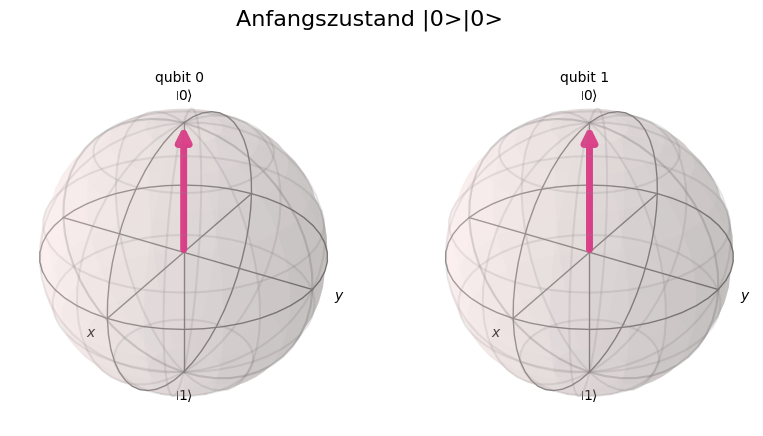

In [8]:
qc.initialize([1,0, 0, 0]) # setzt die beiden Qubits in den Anfangszustand zurück
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Anfangszustand |0>|0>")

Darauf wenden wir die Verschränkungsoperation $CNOT, H |00\rangle$ an. Dies führt zu dem ersten Bell-Zustand: $\Phi^+=\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle$

Versuchen wir nun, diesen vollständig verschränkten Zustand mit `plot_bloch_multivector` zu zeichnen, erhalten wir folgendes Ergebnis:

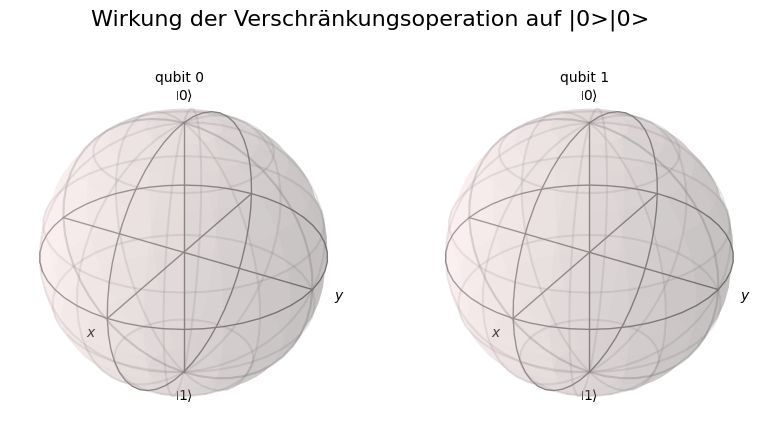

In [9]:
qc.h(0)
qc.cnot(0,1)
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Wirkung der Verschränkungsoperation auf |0>|0>")

Die Blochkugeln sind **leer**.  `plot_bloch_multivector` kann diesen Zustand offenbar nicht darstellen. Weshalb nicht?

## Analyse

Listen wir die vier Bell-Zustände noch einmal untereinander auf und fragen uns, was ihnen gemeinsam ist:

$$
\begin{aligned}
   |00\rangle\longmapsto \Phi^+=\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle\\
   |01\rangle\longmapsto \Psi^+=\frac{1}{\sqrt{2}}|01\rangle+\frac{1}{\sqrt{2}}|10\rangle\\
   |10\rangle\longmapsto \Phi^-=\frac{1}{\sqrt{2}}|00\rangle-\frac{1}{\sqrt{2}}|11\rangle\\
   |11\rangle\longmapsto \Psi^-=\frac{1}{\sqrt{2}}|01\rangle-\frac{1}{\sqrt{2}}|10\rangle
    \end{aligned}
$$


Die gemeinsame Eigenschaft dieser Zustände ist leicht erkennbar: Alle vier Zustandsfunktionen lassen sich **nicht** in ein Produkt zerlegen. Dies wäre aber die Bedingung dafür, dass man diese Zustände aus zwei unabhängigen Qubit-Zuständen zusammengesetzt denken kann. Nur dann könnte in den beiden Blochkugeln auch jeweils ein Zustandsvektor abgebildet werden.

Anders sieht es bei teilverschränkten Qubits aus. Betrachten wir z. B. den Zustand

$$\frac{1}{\sqrt{2}}|01\rangle+\frac{1}{\sqrt{2}}|11\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\cdot|1\rangle=\frac{1}{\sqrt{2}}\begin{bmatrix} 0\\1 \\ 0\\ 1 \end{bmatrix}$$

Dieser lässt sich offenbar in ein Produkt zerlegen. Somit kann dieser Zustand als eine Kombination von zwei Qubits aufgefasst werden. Übergeben wir diesen Zustandsvektor $\begin{bmatrix}0, & \frac{1}{\sqrt{2}}, & 0 & \frac{1}{\sqrt{2}}\end{bmatrix}$ direkt:



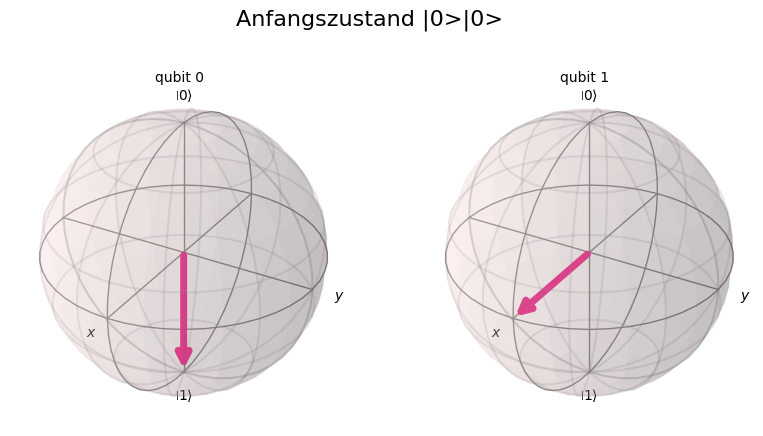

In [10]:
from math import sqrt, pi
qc.initialize([0, 1/sqrt(2), 0, 1/sqrt(2)]) # setzt die beiden Qubits in den gewünschten Zustand
job = execute(qc, backend).result()
plot_bloch_multivector(job.get_statevector(qc), title="Anfangszustand |0>|0>")

Zur Kontrolle drucken wir den Zustandsvektor auch nochmal aus:

In [11]:
print(job.get_statevector(qc))

[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]


Das stimmt mit unserer formalen Rechnung überein! Das Qubit $q_0$ ist im Zustand $|1\rangle$ und das Qubit $q_1$ ist im Zustand $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$, wie man an den Zustandsvektoren in den beiden Blochkugeln direkt sehen kann.

**Experimentieren Sie weiter!** Versuchen Sie z. B. auch die anderen drei Bell-Zustände an `plot_bloch_multivector` zu übergeben oder probieren Sie andere teilverschränkte Qubits aus.
Wie Sie die anderen Bell-Zustände mit Qiskit erzeugen können, erfahren Sie hier: [Bell-Zustände in Qiskit](https://quantumcomputinguk.org/tutorials/introduction-to-bell-states).

Wir hatten die Funktion `plot_bloch_multivector` bereits in Notebook 2 verwendet und brauchen sie auch wieder in Notebook 9 für der Erklärung der Quantenteleportation.